In [1]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
mg = np.random.RandomState(1)
x = np.linspace(0, 6, 200).reshape(-1, 1)  # Перетворення на 2D для MLP
y = np.sin(x.flatten()) + np.sin(6 * x.flatten()) + mg.normal(0, 0.1, x.shape[0])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

In [4]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

In [6]:
mlp = MLPRegressor(max_iter=10000, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,MLPRegressor(...ndom_state=42)
,param_grid,"{'activation': ['relu', 'tanh', ...], 'hidden_layer_sizes': [(50,), (100,), ...], 'learning_rate_init': [0.001, 0.01, ...], 'solver': ['adam', 'sgd', ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [7]:
best_mlp = grid_search.best_estimator_
print("Найкращі параметри:", grid_search.best_params_)

Найкращі параметри: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'solver': 'lbfgs'}


In [8]:
y_train_pred = best_mlp.predict(X_train)
y_test_pred = best_mlp.predict(X_test)

In [9]:
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = best_mlp.score(X_train, y_train)
print(f"Тренувальний датасет: MSE = {mse_train:.4f}, R² = {r2_train:.4f}")

Тренувальний датасет: MSE = 0.0070, R² = 0.9928


In [10]:
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = best_mlp.score(X_test, y_test)
print(f"Тестовий датасет: MSE = {mse_test:.4f}, R² = {r2_test:.4f}")

Тестовий датасет: MSE = 0.0179, R² = 0.9838


In [11]:
train_idx = np.argsort(X_train.flatten())
test_idx = np.argsort(X_test.flatten())

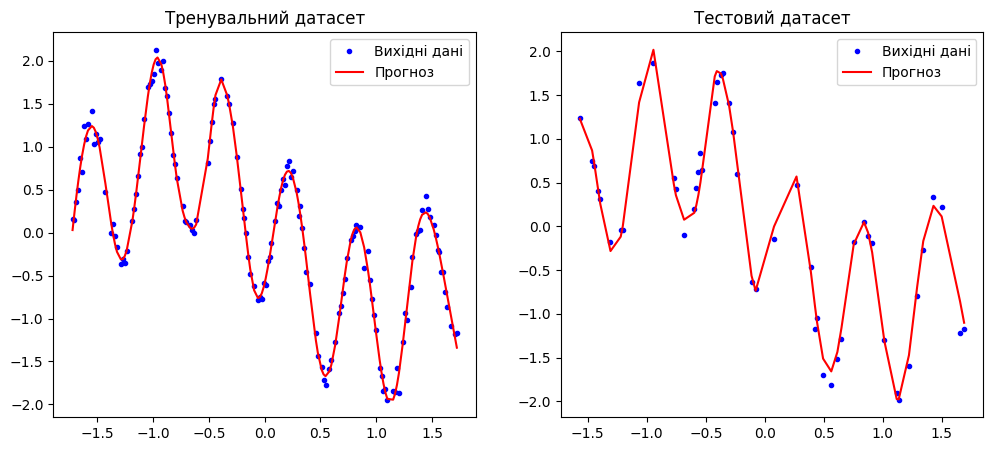

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(X_train[train_idx], y_train[train_idx], 'b.', label='Вихідні дані')
axs[0].plot(X_train[train_idx], y_train_pred[train_idx], 'r-', label='Прогноз')
axs[0].set_title('Тренувальний датасет')
axs[0].legend()

axs[1].plot(X_test[test_idx], y_test[test_idx], 'b.', label='Вихідні дані')
axs[1].plot(X_test[test_idx], y_test_pred[test_idx], 'r-', label='Прогноз')
axs[1].set_title('Тестовий датасет')
axs[1].legend()
plt.show()